# EDA - Cierre Cartera 2017-2020

## Overview of an industry, business or problem

Fundación Amanecer is an entity that contributes to the generation of conditions for sustainable economic development in the Orinoquia region. The foundation accompanies businessmen, peasants, women and young people to lead their transformation under mutual principles of social and financial inclusion, technological adaptation and preservation of environmental quality in the territories.

## Define the specific problem that should be solved 

### General: 

Build a tool for viewing and forecasting the payment behavior of active and new customers to optimize the collection management process.

### Specific: 

- Dynamically produce customer segmentation according to customers behavior or payment habits.
- Visualize through maps, the types of customers according to their payment behavior.
- Know the probability of payment of a borrower.
- Predict and/or forecast the probable date of payment of each client.

**Sites**: Casanare, Meta, Arauca,Vichada and Boyacá departments of Colombia. 

**Clients**: 13.000 active clients.


## Why does this problem matter?

- Fundación Amanecer wants to improve its nonperforming loan indicator. At the national level, the average of the past due portfolio of the microcredit product is 7.8% (Dec 2021). At the end of 2021, the foundation's past due portfolio quality indicator was 10.89%.

- Collection management is vital for financial institutions.

- For its sustainability, a financial entity depends on the collection of its loan portfolio. It is also its main source of growth.

- Improve customer retention. 


## What are the datasets that you will consider to solve this problem? 

- Customer information (Información de clientes).
- Business information (Información de negocios).
- Placement history (Histórico de colocación).
- Portafolio (Sabana de cartera).


# Libraries

To begint with, we are going to import all libraries needed to perform the data wrangling process.

In [1]:
import pandas as pd #To work with pandas
import os #To work with files and folders
import chardet #To detect the encoding type of a file
import numpy as np
import seaborn as sns # To create the visualizations
import matplotlib.pyplot as plt

# Loading the Data

#### Files: 
- 56 files of FUNDACIαN AMANECER_RETO_CIERRE CARTERA.csv from january 2017 to August 2021
- 1 file called "FUNDACIαN AMANECER_RETO_COLOCACION 2017 2021.csv" as c_df
- 1 file called "FUNDACIαN AMANECER_RETO_CONTACTO FINAL.csv" as cf_df
- 1 file called "FUNDACIαN AMANECER_RETO_NEGOCIO FINAL.csv" as

We grouped files that are similar in just one folder called **`CierreCartera`** that lives in a folder called **`Data`**. Our goal is to load all 56 files that are related to **`Cierre de Cartera`** in just one file called "allCierreCartera.csv". Also, we will have all data that comes from these files loaded in just one Dataframe. 


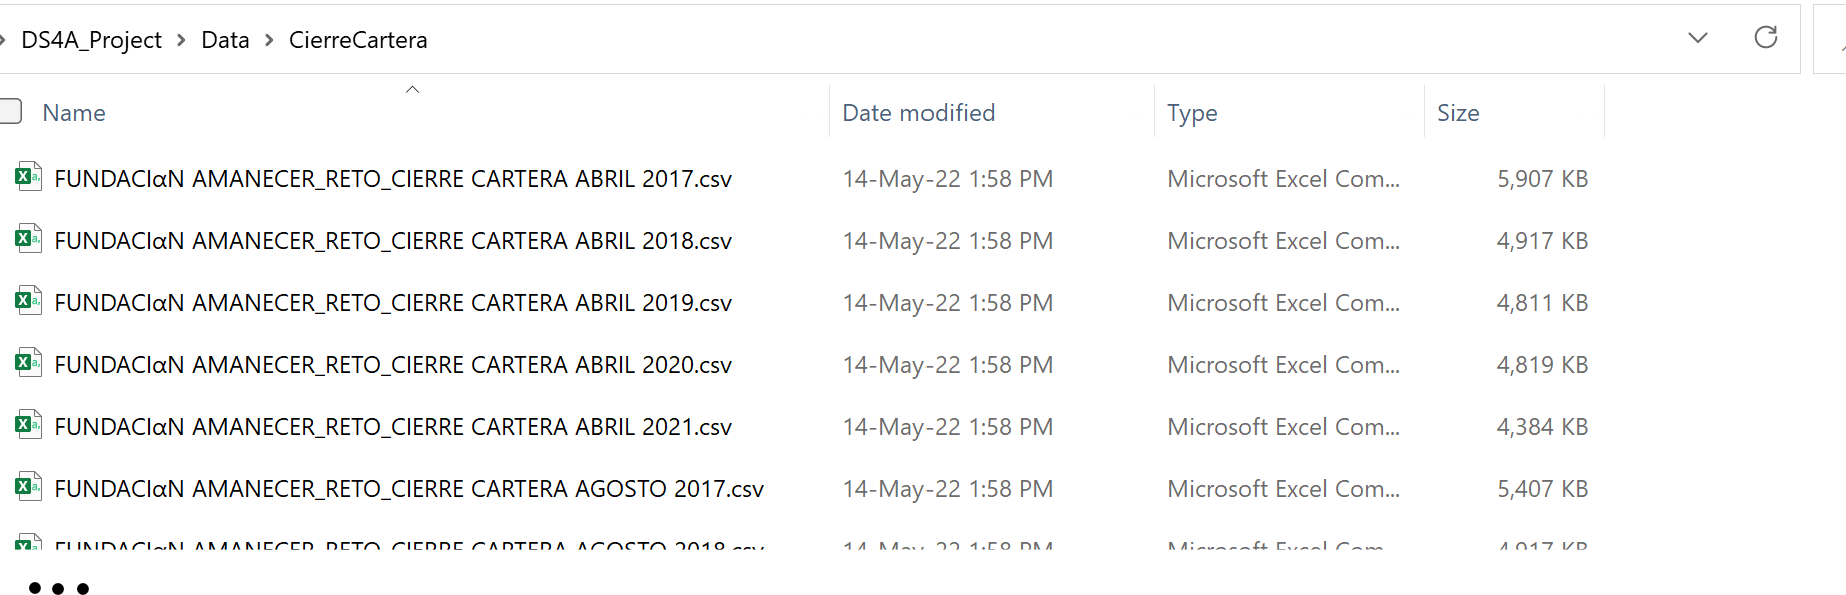

We renamed all 56 files with the next structure: CIERRE CARTERA MONTH YEAR.CSV. The idea behind this is to have them in a short way. So in our Data folder files will look like this:

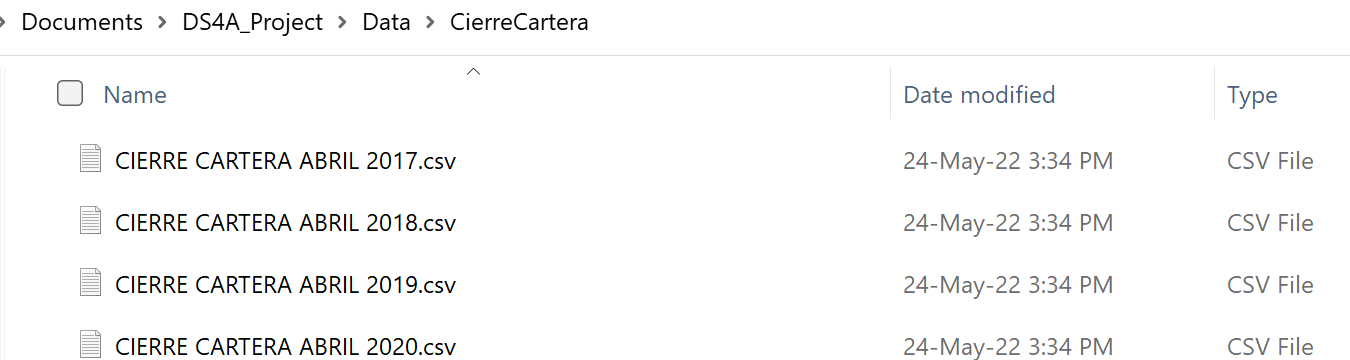




Now, let's start getting all the file names and save them in a data frame called **`files_df`**.

In [2]:
path = "Data/CierreCartera/" # files path
filenames = [] 
for path, subdirs, files in os.walk(path):
    for name in files:
        filenames.append(name)
files_df = pd.DataFrame(filenames, columns=['file'])

Also, we are going to add the columns month and year to better visualize all the files that we have.

In [3]:
months_dict = {
    'ENERO':'January',
    'FEBRERO':'February',
    'MARZO':'March',
    'ABRIL':'April',
    'MAYO':'May',
    'JUNIO':'June',
    'JULIO':'July',
    'AGOSTO':'August',
    'SEPTIEMBRE':'September',
    'OCTUBRE':'October',
    'NOVIEMBRE':'November',
    'DICIEMBRE':'December',
}

date = files_df['file'].str.split(' ', n=3, expand=True)[[2, 3]] # gets the date from the filename
date = pd.to_datetime(date[2].replace(months_dict)+'/'+date[3].str[:-4], format='%B/%Y') # converts to datetime format
files_df['date'] = date
files_df.sort_values(by='date', inplace=True) # sort the files by date
files_df['month'] = date.dt.month_name() # creates "month" column
files_df['year'] = date.dt.year # creates "year" column
files_df.drop('date', axis=1, inplace=True)
files_df.reset_index(drop=True, inplace=True)
files_df.head()

,file,month,year
0,CIERRE CARTERA ENERO 2017.csv,January,2017
1,CIERRE CARTERA FEBRERO 2017.csv,February,2017
2,CIERRE CARTERA MARZO 2017.csv,March,2017
3,CIERRE CARTERA ABRIL 2017.csv,April,2017
4,CIERRE CARTERA MAYO 2017.csv,May,2017


We realized that loading these files as we normally used to, will not work because of the files encoding type. So, we took just one of them to find out its encoding type and be able to read them. For that, we use chardet that gives us a dictionary with file info like this:

``
{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}
``


In [4]:
with open('Data/CierreCartera/CIERRE CARTERA ABRIL 2017.csv', 'rb') as f:
    enc = chardet.detect(f.read())  # or readline if the file is large
    
enc

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

Now, let's loop over each file and use its file path and name to load it as a DataFrame, but at the same time append that DataFrame to a list of DataFrames. Also, let's going to create a new column called **`Source_File`** to record where file each row of data comes from. 
Also, we are going to add some columns to **`files_df`** to save each file properties info for further analysis.

In [5]:
df_list=[]
files_df[['rows', 'columns', 'columns_names']] = 0
for i, file in enumerate(files_df['file']):
    temp = pd.read_csv(path+file, sep=';', encoding = enc['encoding'])
    temp.columns = temp.columns.str.lower().str.strip()
    files_df.iloc[i, 3] = temp.shape[0] # number of rows
    files_df.iloc[i, 4] = temp.shape[1] # number of columns
    files_df.iloc[i, 5] = ','.join(temp.columns.tolist()) # columns names
    temp['reg date'] = pd.to_datetime(str(files_df.iloc[i, 1])+'/'+str(files_df.iloc[i, 2]),
                                      format='%B/%Y')
    df_list.append(temp) # appends the new dataframe to the list

files_df.head()

,file,month,year,rows,columns,columns_names
0,CIERRE CARTERA ENERO 2017.csv,January,2017,15523,61,"tipo,nro solicitud,obligacion,pagare,homologac..."
1,CIERRE CARTERA FEBRERO 2017.csv,February,2017,15461,56,"tipo,nro solicitud,obligacion,pagare,homologac..."
2,CIERRE CARTERA MARZO 2017.csv,March,2017,15562,50,"tipo,nro solicitud,obligacion,pagare,homologac..."
3,CIERRE CARTERA ABRIL 2017.csv,April,2017,15396,50,"tipo,nro solicitud,obligacion,pagare,homologac..."
4,CIERRE CARTERA MAYO 2017.csv,May,2017,15374,42,"tipo,nro solicitud,obligacion,pagare,homologac..."


From the **`files_df`**, we can see that not all the files have the same columns. It could be caused because the company decided to stop recording some features or start recording new features.

In [6]:
files_df['columns'].value_counts()

42    41
43     8
50     2
44     2
61     1
56     1
45     1
Name: columns, dtype: int64

Let's see the columns graphically to understand all this a little better.

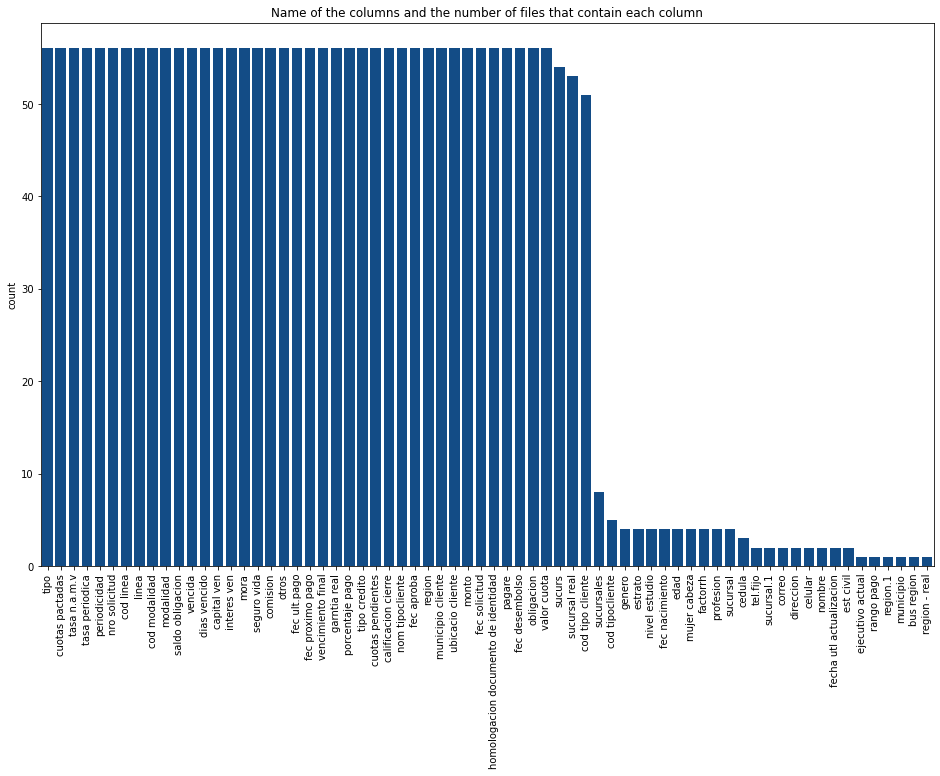

In [7]:
columns_list = files_df['columns_names'].str.split(',', expand=True)
all_columns = columns_list.melt().drop('variable', axis=1)
columns_count = all_columns['value'].value_counts().to_frame('count')
plt.figure(figsize=(16, 10))
sns.barplot(x=columns_count.index, y=columns_count['count'], color=[0, 0.3, 0.6])
plt.xticks(rotation=90)
plt.title('Name of the columns and the number of files that contain each column')
plt.show()

From the previous graph, we can identify a typo since some files have the "cod tipo cliente" column and others have "cod tipocliente", so we should correct that error when we concatenate the dataframes. We also notice that there could be more typos like "sucurs", "sucursal.1", "region" and "region.1", but we need to investigate more.

Then, let's find out which columns appear in all the files.

In [8]:
all_lists = list(columns_list.values)
common_columns = set(all_lists[0]).intersection(*all_lists[1:])
print(common_columns)
print(f'\nThere are {len(common_columns)} common columns.')

{'fec solicitud', 'capital ven', 'saldo obligacion', 'pagare', 'cuotas pactadas', 'tipo', 'garntia real', 'fec desembolso', 'fec aproba', 'linea', 'vencida', 'vencimiento final', 'nro solicitud', 'cod modalidad', 'dias vencido', 'monto', 'seguro vida', 'tasa n.a.m.v', 'comision', 'fec ult.pago', 'fec proximo pago', 'otros', 'homologacion documento de identidad', 'valor cuota', 'cod linea', 'periodicidad', 'tasa periodica', 'ubicacio cliente', 'cuotas pendientes', 'porcentaje pago', 'calificacion cierre', 'municipio cliente', 'obligacion', 'region', 'tipo credito', 'interes ven', 'nom tipocliente', 'modalidad', 'mora'}

There are 39 common columns.


# Data Cleaning 
Using our list of dataframes, we are going to create a new big dataframe that has all data. As we noticed before, there is a typo in the data so we are going to deal with that by renaming the "cod tipocliente" column to "cod tipo cliente".

In [9]:
for df in df_list:
    df.rename(columns={'cod tipocliente':'cod tipo cliente'}, inplace=True)
cierre_cart_df = pd.concat(df_list)
pd.options.display.max_columns = None

And let us explore this new dataframe and info.

In [10]:
cierre_cart_df.head()

,tipo,nro solicitud,obligacion,pagare,homologacion documento de identidad,cod tipo cliente,nom tipocliente,sucursal,region,municipio cliente,ubicacio cliente,fec nacimiento,edad,mujer cabeza,factorrh,profesion,genero,estrato,nivel estudio,est civil,monto,fec solicitud,fec aproba,fec desembolso,valor cuota,cuotas pactadas,cuotas pendientes,tasa n.a.m.v,tasa periodica,periodicidad,calificacion cierre,cod linea,linea,cod modalidad,modalidad,saldo obligacion,vencida,dias vencido,capital ven,interes ven,mora,seguro vida,comision,otros,fec ult.pago,fec proximo pago,vencimiento final,garntia real,porcentaje pago,tipo credito,fecha utl actualizacion,tel.fijo,celular,direccion,correo,sucursal.1,region.1,municipio,bus region,sucursal real,region - real,reg date,sucurs,cedula,nombre,ejecutivo actual,sucursales,rango pago
0,11.0,50906.0,50906.0,59504,FA34042,1.0,Microfinanciero,PAZ DE ARIPORO,REGION NORTE,PAZ DE ARIPORO,RURAL,10/03/1976,40.0,N,NaN,SIN PROFESION,Femenino,1.0,Primaria,Union libre,"6,000,000",9/03/2015,10/03/2015,10/03/2015,856534,3.0,3.0,26.4,6.75,Trimestral,A,GER,GERMINA,497.0,CREDITO RURAL INDIVIDUAL Trimestral - INTV,"1,554,700",-,0.0,"(638,504)","(147,959)",-,-,0,0,42760,10/03/2017,10/09/2017,SIN GARANTIAS REALES,25.91,NUEVO,42735.0,3124306974,3.124307e+09,finca las brisas vda puente casanare htz,sunnyportilla@hotmail.com,VILLANUEVA,REGION SUR,VILLANUEVA,NaN,PAZ DE ARIPORO,REGION NORTE,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,11.0,48911.0,48911.0,57470,FA26082,1.0,Microfinanciero,AGUAZUL,REGION SUR,AGUAZUL,RURAL,19/11/1990,26.0,N,NaN,SIN PROFESION,Masculino,2.0,Secundaria,Union libre,"22,000,000",18/12/2014,19/12/2014,19/12/2014,2473584,8.0,7.0,26.4,6.75,Trimestral,A,GER,GERMINA,497.0,CREDITO RURAL INDIVIDUAL Trimestral - INTV,"11,850,586",-,0.0,-,"(7,206)",-,-,0,0,17/01/2017,19/03/2017,19/09/2018,SIN GARANTIAS REALES,53.87,RENOVADO,42735.0,3184015315,3.133157e+09,calle 9-20-39 Sevilla,andrey_cruz_17@hotmail.com,PAZ DE ARIPORO,REGION NORTE,PAZ DE ARIPORO,NaN,AGUAZUL,REGION SUR,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,11.0,48917.0,48917.0,57476,FA2764,1.0,Microfinanciero,AGUAZUL,REGION SUR,AGUAZUL,RURAL,26/12/1977,39.0,N,NaN,SIN PROFESION,Femenino,2.0,Secundaria,Union libre,"10,000,000",18/12/2014,19/12/2014,19/12/2014,1415561,2.0,2.0,26.4,6.75,Trimestral,A,GER,GERMINA,497.0,CREDITO RURAL INDIVIDUAL Trimestral - INTV,"2,540,899",-,0.0,-,(792),-,-,0,0,42735,19/03/2017,19/06/2017,SIN GARANTIAS REALES,25.41,NUEVO,42735.0,3204090035,3.208401e+09,finca tequendama-,andresn57@hotmail.com,PAZ DE ARIPORO,REGION NORTE,PORE,NaN,AGUAZUL,REGION SUR,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,11.0,48986.0,48986.0,57554,FA28545,1.0,Microfinanciero,YOPAL,REGION CENTRO,YOPAL,URBANA,8/02/1979,38.0,N,NaN,SIN PROFESION,Masculino,2.0,Secundaria,Union libre,"6,000,000",19/12/2014,19/12/2014,22/12/2014,352695,5.0,5.0,33.6,2.80,Mensual,E,MCA,MI CASA,404.0,MICROVIVIENDA,"1,596,871","1,596,871",158.0,"1,596,871","106,976","183,291","18,000",0,0,42735,22/08/2016,22/12/2016,SIN GARANTIAS REALES,26.61,PARALELO,42735.0,3123760019,3.212848e+09,calle 58 b2 oeste 20 villa flor,CE@ACTUALIZAR.COM,PAZ DE ARIPORO,REGION NORTE,TRINIDAD,NaN,YOPAL,REGION CENTRO,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,11.0,49008.0,49008.0,57568,FA35263,1.0,Microfinanciero,GRANADA,REGION META,GRANADA,URBANA,30/12/1982,34.0,N,NaN,SIN PROFESION,Masculino,2.0,Secundaria,Union libre,"10,000,000",19/12/2014,22/12/2014,23/12/2014,483548,13.0,12.0,33.6,2.80,Mensual,A,CRE,CRECER,400.0,DESARROLLO EMPRESARIAL CRECER (PYME),"4,420,375",-,7.0,"269,250","(1,121)","2,549",-,0,0,42737,23/01/2017,23/12/2017,SIN GARANTIAS REALES,44.2,NUEVO,42735.0,3208377987,3.208378e+09,casa 57 villa li etapa 2,osmanmauricio@hotmail.com,SOGAMOSO,REGION SUGAMUXI,SOGAMOSO,NaN,GRANADA,REGION META,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cierre_cart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790696 entries, 0 to 13005
Data columns (total 68 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   tipo                                 790679 non-null  float64       
 1   nro solicitud                        790678 non-null  float64       
 2   obligacion                           790679 non-null  float64       
 3   pagare                               790678 non-null  object        
 4   homologacion documento de identidad  780838 non-null  object        
 5   cod tipo cliente                     790679 non-null  float64       
 6   nom tipocliente                      790679 non-null  object        
 7   sucursal                             61942 non-null   object        
 8   region                               790679 non-null  object        
 9   municipio cliente                    790679 non-null  object        
 1

In the concatenated data frame, we have 67 columns plus the one we created to identify where file each row is coming from. That number of columns is higher than the number of columns of each file loaded since not all the files have the same columns and when we concatenate the files all the columns from the files are created.

Also we can notice that the **`bus_region`** column has 0 non-null values and the **`factorrh`** column has only 7 non-null elements, so we are going to drop them.


In [12]:
cierre_cart_df.drop(['factorrh', 'bus region'], axis=1, inplace=True)

Let's standarize the string objects by removing leading and trailing blanks and converting them into lowercase.

In [13]:
df_obj = cierre_cart_df.select_dtypes(['object'])
cierre_cart_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.lower())

## Duplicates
Let's check if there are duplicate rows in our dataframe.

In [14]:
cierre_cart_df[cierre_cart_df.duplicated(keep=False)==True]

,tipo,nro solicitud,obligacion,pagare,homologacion documento de identidad,cod tipo cliente,nom tipocliente,sucursal,region,municipio cliente,ubicacio cliente,fec nacimiento,edad,mujer cabeza,profesion,genero,estrato,nivel estudio,est civil,monto,fec solicitud,fec aproba,fec desembolso,valor cuota,cuotas pactadas,cuotas pendientes,tasa n.a.m.v,tasa periodica,periodicidad,calificacion cierre,cod linea,linea,cod modalidad,modalidad,saldo obligacion,vencida,dias vencido,capital ven,interes ven,mora,seguro vida,comision,otros,fec ult.pago,fec proximo pago,vencimiento final,garntia real,porcentaje pago,tipo credito,fecha utl actualizacion,tel.fijo,celular,direccion,correo,sucursal.1,region.1,municipio,sucursal real,region - real,reg date,sucurs,cedula,nombre,ejecutivo actual,sucursales,rango pago
14066,NaN,NaN,NaN,NaN,#n/d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN
14069,NaN,NaN,NaN,NaN,#n/d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN
14732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN
14742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN


We have some rows that are essentially null values. We are going to remove them to obtain a cleaner dataframe.

In [15]:
cierre_cart_df.drop_duplicates(keep=False, inplace=True)

## Uninformative columns

Now we are going to check if the columns have useful information, or if, for example, they have the same value for all rows.

In [16]:
for col in cierre_cart_df:
    print(f'column name: {col}, # unique values: {cierre_cart_df[col].nunique()}')
    print('+'*100)

column name: tipo, # unique values: 2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: nro solicitud, # unique values: 56860
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: obligacion, # unique values: 56859
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: pagare, # unique values: 13716
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: homologacion documento de identidad, # unique values: 32499
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: cod tipo cliente, # unique values: 6
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: nom tipocliente, # unique values: 6
+++++++++++++++++++++++++++++++++++++++++

column name: municipio, # unique values: 45
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: sucursal real, # unique values: 14
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: region - real, # unique values: 6
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: reg date, # unique values: 56
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: sucurs, # unique values: 15
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: cedula, # unique values: 24369
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
column name: nombre, # unique values: 21876
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Let's check some columns that have a few unique values

In [17]:
cierre_cart_df['otros'].value_counts()

-            274598
1,279,306         1
Name: otros, dtype: int64

In [18]:
cierre_cart_df['fecha utl actualizacion'].value_counts()

42735.0    30288
Name: fecha utl actualizacion, dtype: int64

Clearly **`otros`** and **`fecha utl actualizacion`** aren't valuable for the subsequent analysis.

In [19]:
cierre_cart_df.drop(labels=['otros', 'fecha utl actualizacion'], axis=1, inplace=True)

Other columns that we consider uninformative for the analysis are **`tel.fijo`**, **`celular`**, **`direccion`**, and **`correo`**.

In [20]:
cierre_cart_df.drop(labels=['tel.fijo', 'celular', 'direccion', 'correo'], axis=1, inplace=True)

## Redundant columns 
We have some doubts about some columns that could have redundant information. Those columns are the following:
- **`sucursal real`** and **`sucurs`**

In [21]:
cierre_cart_df[['sucursal real', 'sucurs']].value_counts(dropna=False)

sucursal real   sucurs
yopal           NaN       117412
paz de ariporo  NaN       100832
villavicencio   NaN        81174
sogamoso        NaN        58691
acacias         NaN        57971
granada         NaN        55983
aguazul         NaN        51614
villanueva      NaN        42831
cumaral         NaN        26976
monterrey       NaN        22504
tame            NaN        21773
tauramena       NaN        16815
NaN             NaN        15467
yopal           1          15350
paz de ariporo  8          11045
villavicencio   2           9797
duitama         NaN         9228
NaN             1           6860
granada         6           6614
aguazul         4           6538
acacias         3           6389
tunja           NaN         5559
villanueva      11          5258
NaN             8           4579
                2           4286
sogamoso        9           4075
monterrey       7           3367
cumaral         5           3117
NaN             4           2855
                6   

It seems that **`sucursal real`** and **`sucurs`** contain the same information but in a different format, so let's conserve just one column. We are going to create a dictionary to use the information from **`sucurs`** to fill the null values in the other column.

In [22]:
a = cierre_cart_df[['sucursal real', 'sucurs']].value_counts().to_frame().reset_index()
b = a[a['sucurs']!='#n/d'].reset_index(drop=True)
b

,sucursal real,sucurs,0
0,yopal,1,15350
1,paz de ariporo,8,11045
2,villavicencio,2,9797
3,granada,6,6614
4,aguazul,4,6538
5,acacias,3,6389
6,villanueva,11,5258
7,sogamoso,9,4075
8,monterrey,7,3367
9,cumaral,5,3117


In [23]:
# Creates a dictionary to adjust the two columns to the same format
zip_iter = zip(b.loc[:13, 'sucurs'], b.loc[:13, 'sucursal real'])
sucursal_dict = dict(zip_iter)
sucursal_dict

{'1': 'yopal',
 '8': 'paz de ariporo',
 '2': 'villavicencio',
 '6': 'granada',
 '4': 'aguazul',
 '3': 'acacias',
 '11': 'villanueva',
 '9': 'sogamoso',
 '7': 'monterrey',
 '5': 'cumaral',
 '10': 'tauramena',
 '12': 'tame',
 '13': 'duitama',
 '14': 'tunja'}

In [24]:
cierre_cart_df['sucurs'] = cierre_cart_df['sucurs'].replace(sucursal_dict)

In [25]:
cierre_cart_df[['sucursal real', 'sucurs']].value_counts()

sucursal real   sucurs        
yopal           yopal             15350
paz de ariporo  paz de ariporo    11045
villavicencio   villavicencio      9797
granada         granada            6614
aguazul         aguazul            6538
acacias         acacias            6389
villanueva      villanueva         5258
sogamoso        sogamoso           4075
monterrey       monterrey          3367
cumaral         cumaral            3117
tauramena       tauramena          1659
tame            tame                774
duitama         duitama             494
tunja           tunja               351
yopal           #n/d                 20
sogamoso        #n/d                 18
paz de ariporo  #n/d                  8
villavicencio   #n/d                  6
cumaral         #n/d                  5
granada         #n/d                  4
monterrey       #n/d                  4
cumaral         villavicencio         2
aguazul         #n/d                  1
villavicencio   cumaral               1
dtype: in

Now, where the **`sucursal real`** column has null values we use the information from the **`sucurs`** column.

In [26]:
index_list = cierre_cart_df['sucursal real'].isnull() 
cierre_cart_df.loc[index_list, 'sucursal real'] = cierre_cart_df['sucurs'][index_list]
cierre_cart_df.drop('sucurs', axis=1, inplace=True)

- **`cod tipo cliente`** and **`nom tipocliente`**

In [27]:
cierre_cart_df[['cod tipo cliente', 'nom tipocliente']].value_counts(dropna=False)

cod tipo cliente  nom tipocliente    
1.0               microfinanciero        775362
4.0               codeudor no cliente      7457
3.0               mixto                    6569
2.0               gestion social           1243
5.0               fondeador                  39
7.0               proveedor                   9
NaN               NaN                         6
dtype: int64

It's clear that **`cod tipo cliente`** and **`nom tipocliente`** contain the same information but in different formats, so we are going to drop one of those columns.

In [28]:
cierre_cart_df.drop('cod tipo cliente', axis=1, inplace=True)

- **`cod linea`** and **`linea`**

In [29]:
cierre_cart_df[['cod linea', 'linea']].value_counts(dropna=False)

cod linea  linea                                   
cre        crecer                                      332449
ger        germina                                     302875
mca        mi casa                                     143560
fid        fidelizacion                                  5647
crn        credinegocio                                  2738
con        convenio                                      2051
crd        credito digital                               1313
grr        garantia real                                   39
une        unete                                            6
NaN        NaN                                              6
           credinegocio 25- 100 smmlv garantia real         1
dtype: int64

**`cod linea`** and **`linea`** also have the same information and, there is a value that does not have a code in the **`cod linea`** column, but this value belongs to the "CREDINEGOCIO" category.

In [30]:
cierre_cart_df.drop('cod linea', axis=1, inplace=True)
cierre_cart_df.replace(to_replace='credinegocio 25- 100 smmlv garantia real',
                       value='credinegocio', inplace=True)

- **`cod modalidad`** and **`modalidad`**

In [31]:
a = cierre_cart_df[['cod modalidad', 'modalidad']].value_counts(dropna=False).to_frame().reset_index().sort_values(by='cod modalidad')
a

,cod modalidad,modalidad,0
21,390.0,microvivienda nuevo dca,1407
36,392.0,desarrollo empresarial crecer (fng emp219),37
23,392.0,emp219 70 desarrollo empresarial crecer fng,1316
38,393.0,credito rural individual - germina (fng emp226),7
26,393.0,emp226 75 credito rural individual - germina fng,771
40,394.0,credito rural individual - germina (fng emp225),5
34,394.0,emp225 60 credito rural individual - germina fng,89
11,395.0,credito rural individual - germina nuevo dca,5829
8,396.0,desarrollo empresarial crecer nuevo dca,9783
32,397.0,credi-desvare negocio semestral,184


In [32]:
a[a.duplicated(subset=['cod modalidad'], keep=False)]

,cod modalidad,modalidad,0
36,392.0,desarrollo empresarial crecer (fng emp219),37
23,392.0,emp219 70 desarrollo empresarial crecer fng,1316
38,393.0,credito rural individual - germina (fng emp226),7
26,393.0,emp226 75 credito rural individual - germina fng,771
40,394.0,credito rural individual - germina (fng emp225),5
34,394.0,emp225 60 credito rural individual - germina fng,89
1,400.0,desarrollo empresarial crecer (pyme),171167
3,400.0,desarrollo empresarial crecer (pyme) renovacion,66915
0,403.0,credito rural individual - germina,179828
7,403.0,credito rural individual germina,24753


Again the **`cod modalidad`** and **`modalidad`** features show essentially the same information, and there are also some typos that we need to fix. First, we are going to drop the **`cod modalidad`** column.

Then, let's standarize the **`modalidad`** categories.

In [33]:
modalidad_dict = {
    'emp219 70 desarrollo empresarial crecer fng':'desarrollo empresarial crecer (fng emp219)',
    'emp226 75 credito rural individual - germina fng':'credito rural individual - germina  (fng emp226)',
    'emp225 60 credito rural individual - germina fng':'credito rural individual - germina (fng emp225)',
    'desarrollo empresarial crecer (pyme) renovacion':'desarrollo empresarial crecer (pyme)',
    'credito rural individual germina':'credito rural individual - germina',
}
cierre_cart_df.replace(modalidad_dict, inplace=True)

In [34]:
cierre_cart_df[['cod modalidad', 'modalidad']].value_counts(dropna=False).to_frame().reset_index().sort_values(by='cod modalidad')

,cod modalidad,modalidad,0
19,390.0,microvivienda nuevo dca,1407
20,392.0,desarrollo empresarial crecer (fng emp219),1353
24,393.0,credito rural individual - germina (fng emp226),778
32,394.0,credito rural individual - germina (fng emp225),94
9,395.0,credito rural individual - germina nuevo dca,5829
6,396.0,desarrollo empresarial crecer nuevo dca,9783
30,397.0,credi-desvare negocio semestral,184
10,398.0,credi-desvare emergencia trimestral,4946
8,399.0,crédi cosecha,5927
0,400.0,desarrollo empresarial crecer (pyme),238082


In [35]:
cierre_cart_df.drop('cod modalidad', axis=1, inplace=True)

- **`region`** and **`region - real`**

In [36]:
cierre_cart_df[['region', 'region - real']].value_counts(dropna=False).to_frame()

,,0
region,region - real,
region sur,NaN,151688
region norte,NaN,134309
region centro,NaN,134240
region villavicencio,NaN,111793
region ariari,NaN,85817
region sugamuxi,NaN,62219
region meta,NaN,51559
centro norte,NaN,10094
region tundama,NaN,9722


As with the previous cases **`region`** and **`region - real`** columns are redundant. We need to correct some typos as well.

In [37]:
cierre_cart_df.drop('region - real', axis=1, inplace=True)

In [38]:
region_dict = {
    'sur':'region sur',
    'ariari':'region ariari',
    'villavicencio':'region villavicencio',
    'sugamuxi':'region sugamuxi',
    'region crentro boyaca':'region centro boyaca',
    'centro boyaca':'region centro boyaca'
}
cierre_cart_df.replace(region_dict, inplace=True)

In [39]:
cierre_cart_df['region'].value_counts()

region sur              161680
region centro           137711
region norte            136586
region villavicencio    118754
region ariari            90743
region sugamuxi          64635
region meta              54844
centro norte             10094
region tundama            9722
region centro boyaca      5910
Name: region, dtype: int64

Finally, we have a new dataset with 55 columns.

## Data types

The next step is to convert some columns into the right data type.

In [40]:
# categorical columns
cat_columns = ['tipo', 'nro solicitud', 'obligacion', 'pagare',
              'homologacion documento de identidad', 'nom tipocliente',
              'mujer cabeza', 'profesion', 'genero', 'estrato', 'nivel estudio',
              'est civil', 'calificacion cierre', 'linea', 'modalidad', 'garntia real',
              'tipo credito', 'cedula']

cierre_cart_df[cat_columns] = cierre_cart_df[cat_columns].astype('category')

In [41]:
# datetime columns
datetime_columns = ['fec nacimiento', 'fec solicitud', 'fec aproba', 'fec desembolso',
                    'fec ult.pago', 'fec proximo pago', 'vencimiento final']

cierre_cart_df[datetime_columns] = cierre_cart_df[datetime_columns].apply(pd.to_datetime, errors='coerce')

In [42]:
# integer columns
int_columns = ['edad', 'cuotas pactadas', 'cuotas pendientes', 'dias vencido']

cierre_cart_df[int_columns] = cierre_cart_df[int_columns].astype('float')

In [43]:
# float columns

# Before converting to float type we need to remove some non-numerical characters
# that can affect the conversion.

import re 
# removes non-numerical characters
non_decimal = re.compile(r'[^\d.]+')

float_columns = ['monto', 'valor cuota', 'saldo obligacion', 'vencida', 'capital ven', 
                 'interes ven', 'mora', 'seguro vida', 'comision', 'porcentaje pago']

for column in float_columns:
    cierre_cart_df[column]
    cierre_cart_df[column] = cierre_cart_df[column].apply(lambda x: non_decimal.sub('', str(x)))
    cierre_cart_df[column] = pd.to_numeric(cierre_cart_df[column], errors='coerce')

At this point, we have a new cleaner dataframe to continue with our EDA.

In [44]:
cierre_cart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 790685 entries, 0 to 13005
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   tipo                                 790679 non-null  category      
 1   nro solicitud                        790678 non-null  category      
 2   obligacion                           790679 non-null  category      
 3   pagare                               25848 non-null   category      
 4   homologacion documento de identidad  780836 non-null  category      
 5   nom tipocliente                      790679 non-null  category      
 6   sucursal                             61942 non-null   object        
 7   region                               790679 non-null  object        
 8   municipio cliente                    790679 non-null  object        
 9   ubicacio cliente                     790677 non-null  object        
 1

Last, we save this data to a csv file so we can avoid previous steps later on.

In [45]:
#cierre_cart_df.to_csv("Data/allCierreCartera.csv", index=False)

# EDA

In [46]:
try:
  df = pd.read_csv("Data/allCierreCartera.csv", );
  #low memory = False because columns Columns (4,8,11,12,14,15,16,17,19,20,38,39,40,41,50,52,53,54,55,56,57,58,59,61,62,64,66,68,69,70,71,72,74) have mixed types
  df.head()
except:
  print("You sure you did step 0? Seems that allCierreCartera.csv does not exist. Go back run step 0 and then come back to step 1")

C:\Users\usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,6,10,12,13,14,16,17,45,46,47,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790685 entries, 0 to 790684
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   tipo                                 790679 non-null  float64
 1   nro solicitud                        790678 non-null  float64
 2   obligacion                           790679 non-null  float64
 3   pagare                               25848 non-null   object 
 4   homologacion documento de identidad  780836 non-null  object 
 5   nom tipocliente                      790679 non-null  object 
 6   sucursal                             61942 non-null   object 
 7   region                               790679 non-null  object 
 8   municipio cliente                    790679 non-null  object 
 9   ubicacio cliente                     790677 non-null  object 
 10  fec nacimiento                       61942 non-null   object 
 11  edad         

# Data Visualization

## Clients Distribution

Now, let's do some data visualization. First, we're going to check how clients are distributed between each region.

As we can see in the table and graphs below, the region with more clients is Region Sur.

In [48]:
cierre_cart_df.drop_duplicates('homologacion documento de identidad').value_counts('region').to_frame().rename(columns={0:'no. clientes region'})

,no. clientes region
region,
region sur,6411
region centro,5637
region norte,5426
region meta,4620
region villavicencio,4538
region sugamuxi,2791
region ariari,1780
region tundama,660
region centro boyaca,460


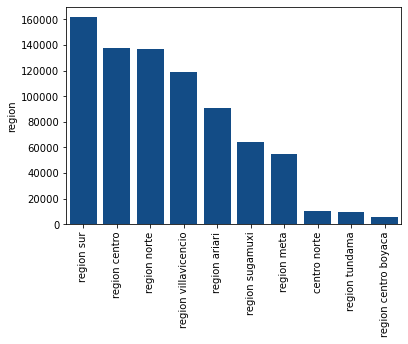

In [49]:
sns.barplot(x=cierre_cart_df['region'].value_counts().to_frame().index, y=cierre_cart_df['region'].value_counts().to_frame()['region'], color=[0, 0.3, 0.6])
plt.xticks(rotation=90)
plt.show()

## Credit Type Distribution

Let's check what's the type of credit more requested by clients.

In [50]:
cierre_cart_df['nom tipocliente'].value_counts().to_frame().rename(columns={'nom tipocliente':'no. clientes cred'})

,no. clientes cred
microfinanciero,775362
codeudor no cliente,7457
mixto,6569
gestion social,1243
fondeador,39
proveedor,9


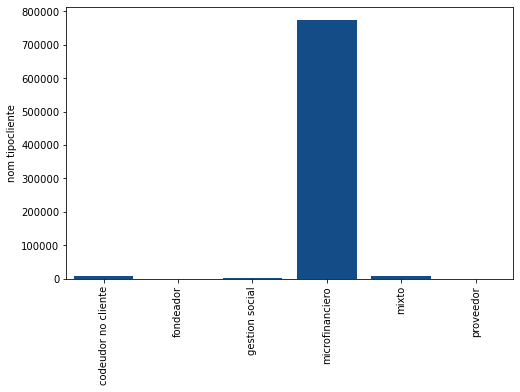

In [51]:
#Check tipo nomcliente, and tipo nomcliente by region, and by first 5 cities
plt.figure(figsize=(8, 5))
sns.barplot(x=cierre_cart_df['nom tipocliente'].value_counts().to_frame().index, y=cierre_cart_df['nom tipocliente'].value_counts().to_frame()['nom tipocliente'], color=[0, 0.3, 0.6])
plt.xticks(rotation=90)
plt.show()

Now, let's see how's the distribution of every credit type for each region.

In [52]:
cierre_cart_df.groupby(['region', 'nom tipocliente']).size().to_frame().rename(columns={'nom tipocliente':'tipo credito', 0:'no. clientes'})

no. clientes
region               nom tipocliente                  
centro norte         codeudor no cliente           100
                     fondeador                       2
                     gestion social                 13
                     microfinanciero              9852
                     mixto                         127
                     proveedor                       0
region ariari        codeudor no cliente          1498
                     fondeador                      22
                     gestion social                214
                     microfinanciero             88170
                     mixto                         831
                     proveedor                       8
region centro        codeudor no cliente           599
                     fondeador                      11
                     gestion social                215
                     microfinanciero            134640
                     mixto                        2246
                     proveedor                       0
region centro boyaca codeudor no cliente            41
                     fondeador                       0
                     gestion social                 12
                     microfinanciero              5857
                     mixto                           0
                     proveedor                       0
region meta          codeudor no cliente           428
                     fondeador                       0
                     gestion social                 92
                     microfinanciero             53746
                     mixto                         578
                     proveedor                       0
region norte         codeudor no cliente          1277
                     fondeador                       0
                     gestion social                241
                     microfinanciero            133963
                     mixto                        1104
                     proveedor                       1
region sugamuxi      codeudor no cliente           911
                     fondeador                       0
                     gestion social                 78
                     microfinanciero             63646
                     mixto                           0
                     proveedor                       0
region sur           codeudor no cliente          1648
                     fondeador                       0
                     gestion social                332
                     microfinanciero            158309
                     mixto                        1391
                     proveedor                       0
region tundama       codeudor no cliente           106
                     fondeador                       0
                     gestion social                  0
                     microfinanciero              9616
                     mixto                           0
                     proveedor                       0
region villavicencio codeudor no cliente           849
                     fondeador                       4
                     gestion social                 46
                     microfinanciero            117563
                     mixto                         292
                     proveedor                       0

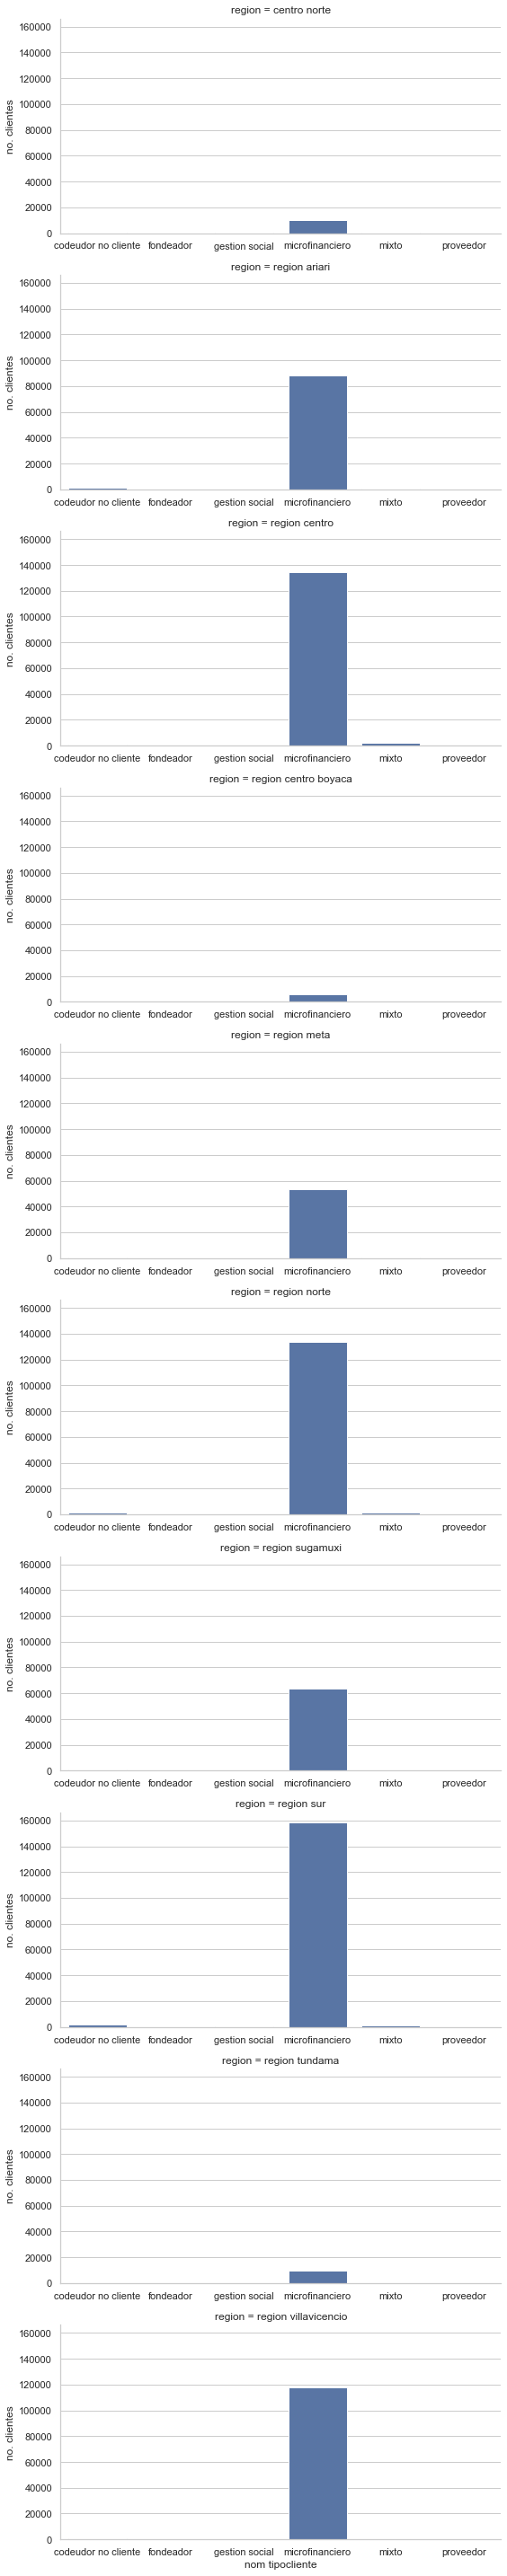

In [53]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(cierre_cart_df.groupby(['region', 'nom tipocliente']).size().to_frame().rename(columns={'nom tipocliente':'tipo credito', 0:'no. clientes'}).reset_index(), 
                  row ='region', height=4, aspect=2, sharex=False)
g.map_dataframe(sns.barplot, 'nom tipocliente', 'no. clientes')
plt.show()

In general, the most requested credit type in every region is Microfinanciero.

## Amount of Money Borrowed

We're going to take a look at how is the distribution of the ammount of money borrowed.

In [54]:
cierre_cart_df['monto'].describe().astype(int)

count      790679
mean      4941590
std       5135274
min        300000
25%       2000000
50%       3000000
75%       6000000
max      80000000
Name: monto, dtype: int32

As we can see, ammounts goes from COP 300.000 to COP 80.000.000.

Taking into account the ammount of data for the variable 'monto', let's categorize our clients by the ammpunt of money they borrowed:
1. Clients who borrowed less than COP 1.000.000.
2. Clients who borrowed between COP 1.000.000 and 5.000.000.
3. Clients who borrowed between COP 5.000.000 and 10.000.000.
4. Clients who borrowed more than COP 10.000.000.

To accomplish that, we're going to create a new column in our dataframe called 'cat_monto'.

In [55]:
#Creating a new column to categorize clients by the ammount of money they borrowed

condlist = [(cierre_cart_df['monto'] <= 1000000), 
            (1000000 < cierre_cart_df['monto']) & (cierre_cart_df['monto'] <= 5000000), 
            (5000000 < cierre_cart_df['monto']) & (cierre_cart_df['monto'] <= 10000000)]
choicelist = [1, 2 , 3]
cierre_cart_df['cat_monto'] = np.select(condlist, choicelist, default = 4)
cierre_cart_df['cat_monto'] = cierre_cart_df['cat_monto'].astype('category')
cierre_cart_df['cat_monto']

0        3
1        4
2        3
3        3
4        3
        ..
13001    4
13002    3
13003    4
13004    3
13005    2
Name: cat_monto, Length: 790685, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [56]:
cierre_cart_df['cat_monto'].value_counts().to_frame()

,cat_monto
2,506585
3,147315
1,72811
4,63974


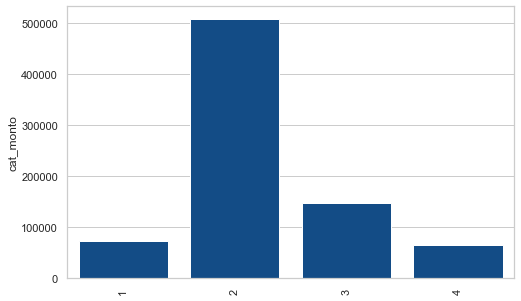

In [57]:
plt.figure(figsize=(8, 5))
sns.barplot(x=cierre_cart_df['cat_monto'].value_counts().to_frame().index, y=cierre_cart_df['cat_monto'].value_counts().to_frame()['cat_monto'], color=[0, 0.3, 0.6])
plt.xticks(rotation=90)
plt.show()

As shown in the graph above, most clients borrow ammounts between COP 1.000.000 and COP 5.000.000.

Now let's see this distribution for every region.

In [58]:
cierre_cart_df.groupby(['region', 'cat_monto'])['cat_monto'].count().to_frame().rename(columns={'cat_monto':'count'}).reset_index()

,region,cat_monto,count
0,centro norte,1,859
1,centro norte,2,5653
2,centro norte,3,2133
3,centro norte,4,1449
4,region ariari,1,8326
5,region ariari,2,63859
6,region ariari,3,14322
7,region ariari,4,4236
8,region centro,1,10028
9,region centro,2,77481


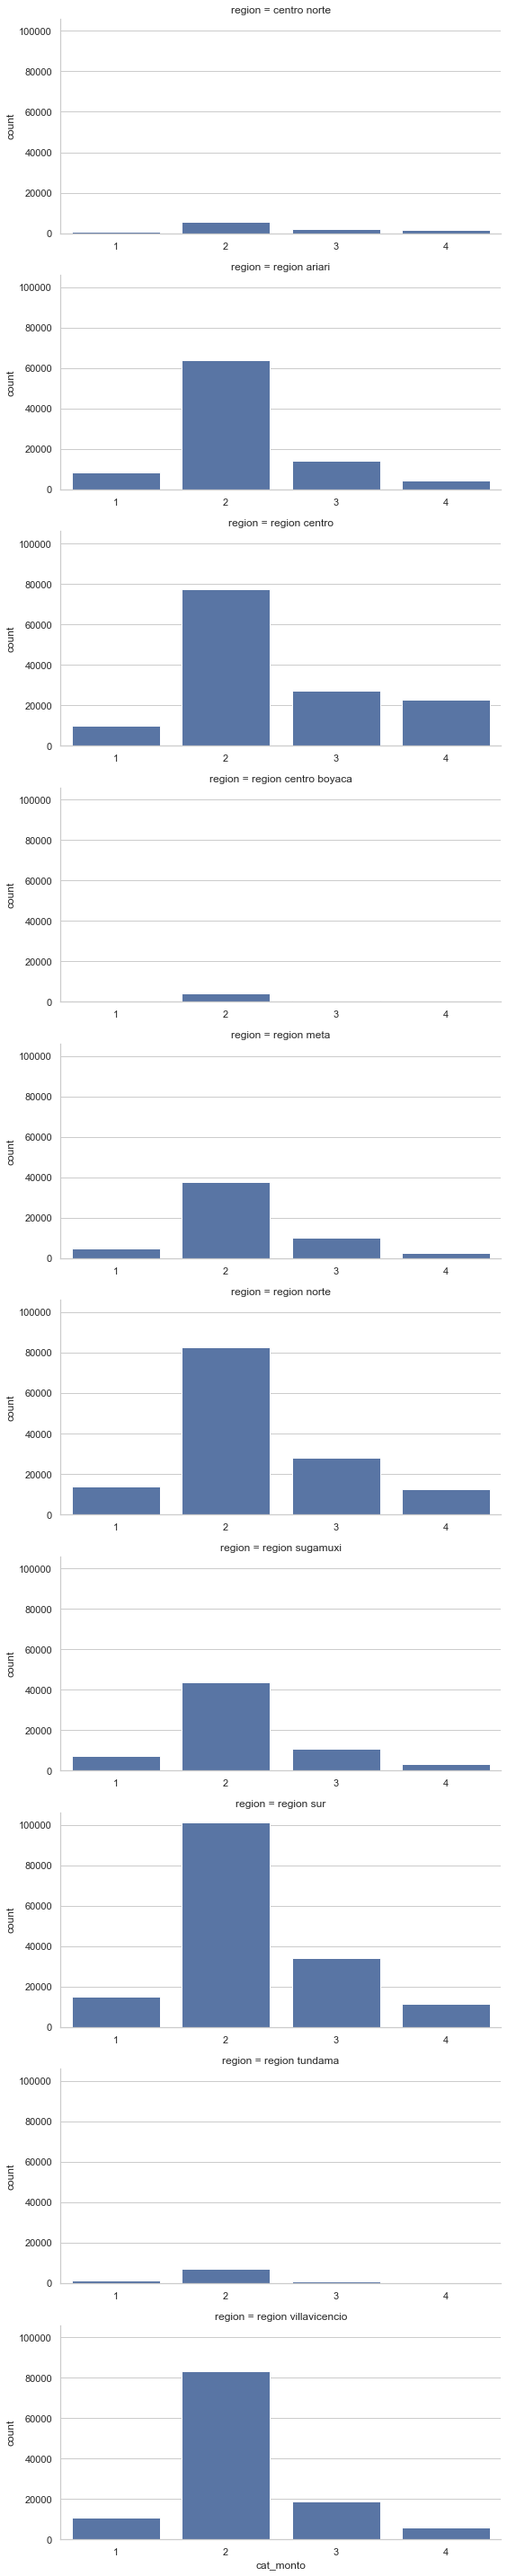

In [59]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(cierre_cart_df.groupby(['region', 'cat_monto'])['cat_monto'].count().to_frame().rename(columns={'cat_monto':'count'}).reset_index(), 
                  row ='region', height=4, aspect=2, sharex=False)
g.map_dataframe(sns.barplot, 'cat_monto', 'count')
plt.show()

As we can evidence, this trend remains for every region. 

## Expiration Days

Let's explore 'dias vencimiento'.

(array([7.02238e+05, 3.25580e+04, 2.31770e+04, 1.57580e+04, 9.21400e+03,
        4.98600e+03, 2.03300e+03, 5.70000e+02, 1.22000e+02, 2.30000e+01]),
 array([   0. ,  112.5,  225. ,  337.5,  450. ,  562.5,  675. ,  787.5,
         900. , 1012.5, 1125. ]),
 <BarContainer object of 10 artists>)

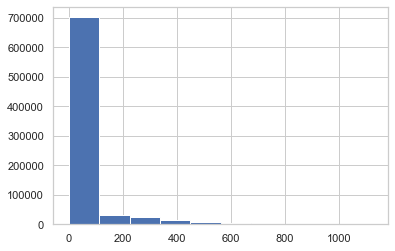

In [60]:
cierre_cart_df['meses vencido'] = cierre_cart_df['dias vencido']/30
plt.hist(cierre_cart_df['dias vencido'])

We can see that most slow payers are between 1 and 100 days late.

## Relationships between `Expiration days` and other variables
One of the objectives of this project is to predict the likely payment date as measured by the number of days after or before the given date of payment. That's why we are going to investigate if there is a relationship between the expiration days and other variables (which could be used for the model).

- **Client Type** vs. **Expiration Days**

In [61]:
cierre_cart_df.groupby('nom tipocliente')['dias vencido'].describe()

,count,mean,std,min,25%,50%,75%,max
nom tipocliente,,,,,,,,
codeudor no cliente,7457.0,13.833981,58.645428,0.0,0.0,0.0,0.0,623.0
fondeador,39.0,3.358974,5.034027,0.0,0.0,0.0,9.0,16.0
gestion social,1243.0,31.901850,92.459418,0.0,0.0,0.0,0.0,643.0
microfinanciero,775362.0,40.694970,112.432115,0.0,0.0,0.0,9.0,1125.0
mixto,6569.0,23.889633,82.290624,0.0,0.0,0.0,0.0,693.0
proveedor,9.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


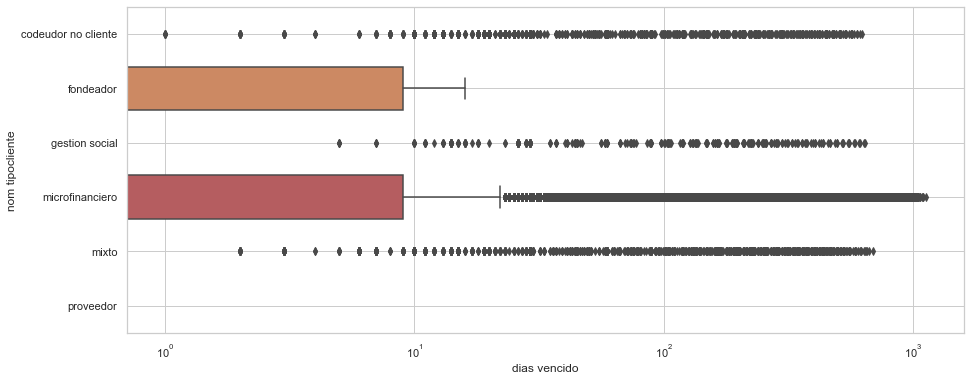

In [62]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='dias vencido', y='nom tipocliente', data=cierre_cart_df)
plt.xscale('log')
plt.grid('on')
plt.show()

- **Amount** vs. **Expiration Days**

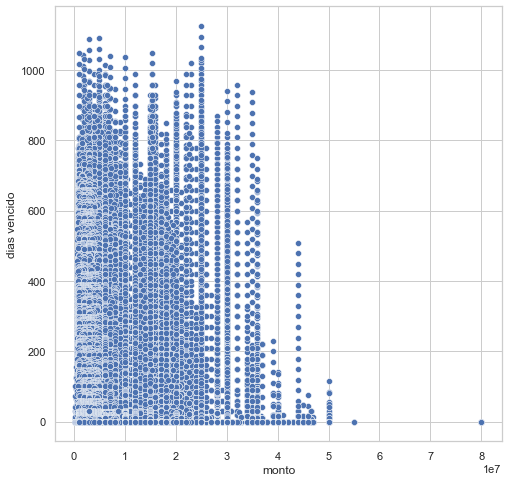

In [63]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='monto', y='dias vencido', data=cierre_cart_df)
plt.show()

- **Age** vs. **Expiration Days**

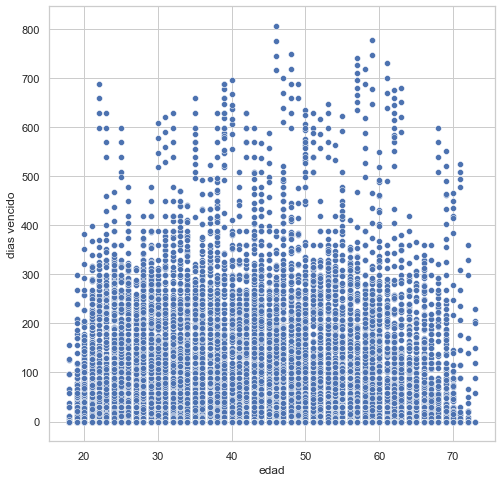

In [64]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='edad', y='dias vencido', data=cierre_cart_df)
plt.show()

- **Region** vs **Expiration Days**

In [65]:
cierre_cart_df.groupby('region')['dias vencido'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
centro norte,10094.0,39.718348,110.422846,0.0,0.0,0.0,7.0,910.0
region ariari,90743.0,48.331486,125.484205,0.0,0.0,0.0,11.0,1033.0
region centro,137711.0,43.527147,118.852793,0.0,0.0,0.0,11.0,1125.0
region centro boyaca,5910.0,25.681895,68.835492,0.0,0.0,0.0,17.0,505.0
region meta,54844.0,31.074028,77.286877,0.0,0.0,0.0,11.0,856.0
region norte,136586.0,34.188702,105.457261,0.0,0.0,0.0,0.0,1091.0
region sugamuxi,64635.0,33.815193,103.377452,0.0,0.0,0.0,0.0,929.0
region sur,161680.0,39.994415,112.356004,0.0,0.0,0.0,7.0,1049.0
region tundama,9722.0,22.089693,64.355416,0.0,0.0,0.0,0.0,563.0


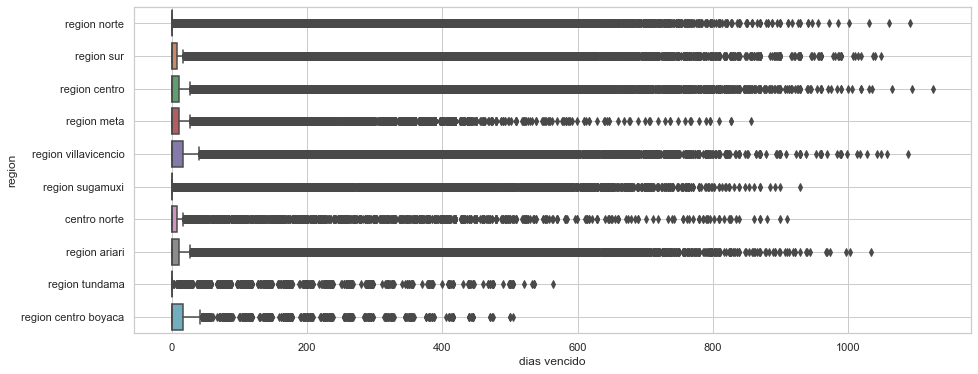

In [66]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='dias vencido', y='region', data=cierre_cart_df)
#plt.xscale('log')
plt.grid('on')
plt.show()

- **Client location** vs. **Expiration days**

In [67]:
cierre_cart_df.groupby('ubicacio cliente')['dias vencido'].describe()

,count,mean,std,min,25%,50%,75%,max
ubicacio cliente,,,,,,,,
rural,326859.0,31.906547,100.790724,0.0,0.0,0.0,0.0,1033.0
urbana,463818.0,46.191107,118.651769,0.0,0.0,0.0,15.0,1125.0


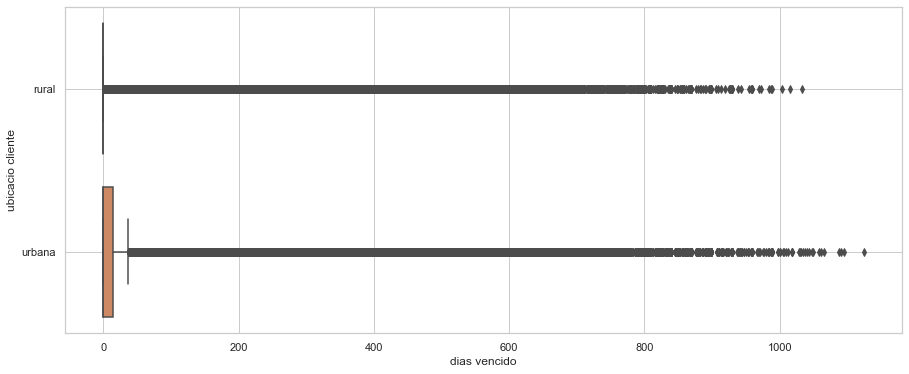

In [68]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='dias vencido', y='ubicacio cliente', data=cierre_cart_df)
#plt.xscale('log')
plt.grid('on')
plt.show()

- **Periodicity** vs. **Expiration days**

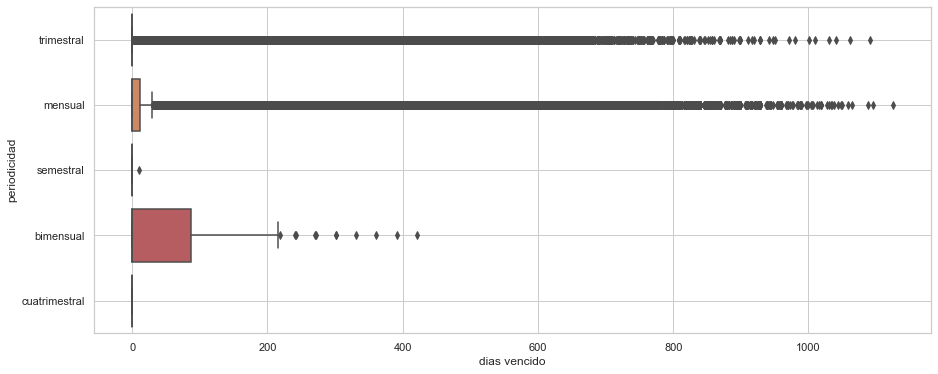

In [69]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='dias vencido', y='periodicidad', data=cierre_cart_df)
#plt.xscale('log')
plt.grid('on')
plt.show()

- **Quota value** vs. **Expiration days**

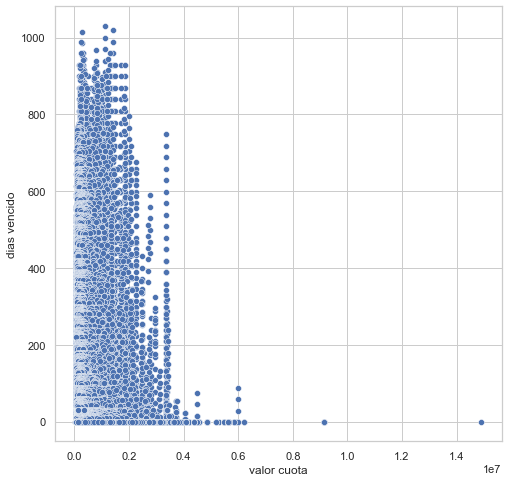

In [70]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='valor cuota', y='dias vencido', data=cierre_cart_df)
plt.show()

In [95]:
idx = (cierre_cart_df['homologacion documento de identidad']=='fa34042')&(cierre_cart_df['obligacion']==50906.0)
cierre_cart_df[idx].head()

,tipo,nro solicitud,obligacion,pagare,homologacion documento de identidad,nom tipocliente,sucursal,region,municipio cliente,ubicacio cliente,fec nacimiento,edad,mujer cabeza,profesion,genero,estrato,nivel estudio,est civil,monto,fec solicitud,fec aproba,fec desembolso,valor cuota,cuotas pactadas,cuotas pendientes,tasa n.a.m.v,tasa periodica,periodicidad,calificacion cierre,linea,modalidad,saldo obligacion,vencida,dias vencido,capital ven,interes ven,mora,seguro vida,comision,fec ult.pago,fec proximo pago,vencimiento final,garntia real,porcentaje pago,tipo credito,sucursal.1,region.1,municipio,sucursal real,reg date,cedula,nombre,ejecutivo actual,sucursales,rango pago,cat_monto,meses vencido
0,11.0,50906.0,50906.0,NaN,fa34042,microfinanciero,paz de ariporo,region norte,paz de ariporo,rural,1976-10-03,40.0,n,sin profesion,femenino,1.0,primaria,union libre,6000000.0,2015-09-03,2015-10-03,2015-10-03,NaN,3.0,3.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,1554700.0,NaN,0.0,638504.0,147959.0,NaN,NaN,NaN,NaT,2017-10-03,2017-10-09,sin garantias reales,25.91,nuevo,villanueva,region sur,villanueva,paz de ariporo,2017-01-01,NaN,NaN,NaN,NaN,NaN,3,0.000000
10969,11.0,50906.0,50906.0,NaN,fa34042,microfinanciero,paz de ariporo,region norte,paz de ariporo,rural,1976-10-03,41.0,n,sin profesion,femenino,1.0,primaria,union libre,6000000.0,2015-09-03,2015-10-03,2015-10-03,NaN,3.0,3.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,1554700.0,NaN,0.0,638504.0,150352.0,NaN,9000.0,NaN,2017-01-25,2017-10-03,2017-10-09,sin garantias reales,25.91,nuevo,7,NaN,NaN,NaN,2017-02-01,NaN,NaN,NaN,NaN,NaN,3,0.000000
11253,11.0,50906.0,50906.0,NaN,fa34042,microfinanciero,paz de ariporo,region norte,paz de ariporo,rural,1976-10-03,41.0,n,sin profesion,femenino,1.0,primaria,NaN,6000000.0,2015-09-03,2015-10-03,2015-10-03,NaN,3.0,3.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,1554700.0,NaN,20.0,28508.0,21537.0,708.0,NaN,NaN,2017-01-25,2017-10-03,2017-10-09,sin garantias reales,25.91,nuevo,NaN,NaN,NaN,paz de ariporo,2017-03-01,NaN,NaN,NaN,NaN,NaN,3,0.666667
11306,11.0,50906.0,50906.0,NaN,fa34042,microfinanciero,paz de ariporo,region norte,paz de ariporo,rural,1976-10-03,41.0,n,sin profesion,femenino,1.0,primaria,NaN,6000000.0,2015-09-03,2015-10-03,2015-10-03,NaN,3.0,3.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,1554700.0,1554700.0,50.0,28508.0,21537.0,1720.0,NaN,NaN,2017-01-25,2017-10-03,2017-10-09,sin garantias reales,25.91,nuevo,NaN,NaN,NaN,yopal,2017-04-01,NaN,NaN,NaN,NaN,NaN,3,1.666667
11529,11.0,50906.0,50906.0,NaN,fa34042,microfinanciero,NaN,region norte,paz de ariporo,rural,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000000.0,2015-09-03,2015-10-03,2015-10-03,856534.0,3.0,2.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,1526192.0,NaN,0.0,NaN,21537.0,NaN,NaN,NaN,2017-05-31,2017-10-06,2017-10-09,sin garantias reales,25.44,nuevo,NaN,NaN,NaN,paz de ariporo,2017-05-01,NaN,NaN,NaN,NaN,NaN,3,0.000000


In [89]:
cierre_cart_df.head()

,tipo,nro solicitud,obligacion,pagare,homologacion documento de identidad,nom tipocliente,sucursal,region,municipio cliente,ubicacio cliente,fec nacimiento,edad,mujer cabeza,profesion,genero,estrato,nivel estudio,est civil,monto,fec solicitud,fec aproba,fec desembolso,valor cuota,cuotas pactadas,cuotas pendientes,tasa n.a.m.v,tasa periodica,periodicidad,calificacion cierre,linea,modalidad,saldo obligacion,vencida,dias vencido,capital ven,interes ven,mora,seguro vida,comision,fec ult.pago,fec proximo pago,vencimiento final,garntia real,porcentaje pago,tipo credito,sucursal.1,region.1,municipio,sucursal real,reg date,cedula,nombre,ejecutivo actual,sucursales,rango pago,cat_monto,meses vencido
0,11.0,50906.0,50906.0,NaN,fa34042,microfinanciero,paz de ariporo,region norte,paz de ariporo,rural,1976-10-03,40.0,n,sin profesion,femenino,1.0,primaria,union libre,6000000.0,2015-09-03,2015-10-03,2015-10-03,NaN,3.0,3.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,1554700.0,NaN,0.0,638504.0,147959.0,NaN,NaN,NaN,NaT,2017-10-03,2017-10-09,sin garantias reales,25.91,nuevo,villanueva,region sur,villanueva,paz de ariporo,2017-01-01,NaN,NaN,NaN,NaN,NaN,3,0.000000
1,11.0,48911.0,48911.0,NaN,fa26082,microfinanciero,aguazul,region sur,aguazul,rural,1990-11-19,26.0,n,sin profesion,masculino,2.0,secundaria,union libre,22000000.0,2014-12-18,2014-12-19,2014-12-19,NaN,8.0,7.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,11850586.0,NaN,0.0,NaN,7206.0,NaN,NaN,NaN,2017-01-17,2017-03-19,2018-09-19,sin garantias reales,53.87,renovado,paz de ariporo,region norte,paz de ariporo,aguazul,2017-01-01,NaN,NaN,NaN,NaN,NaN,4,0.000000
2,11.0,48917.0,48917.0,NaN,fa2764,microfinanciero,aguazul,region sur,aguazul,rural,1977-12-26,39.0,n,sin profesion,femenino,2.0,secundaria,union libre,10000000.0,2014-12-18,2014-12-19,2014-12-19,NaN,2.0,2.0,26.4,6.75,trimestral,a,germina,credito rural individual trimestral - intv,2540899.0,NaN,0.0,NaN,792.0,NaN,NaN,NaN,NaT,2017-03-19,2017-06-19,sin garantias reales,25.41,nuevo,paz de ariporo,region norte,pore,aguazul,2017-01-01,NaN,NaN,NaN,NaN,NaN,3,0.000000
3,11.0,48986.0,48986.0,NaN,fa28545,microfinanciero,yopal,region centro,yopal,urbana,1979-08-02,38.0,n,sin profesion,masculino,2.0,secundaria,union libre,6000000.0,2014-12-19,2014-12-19,2014-12-22,NaN,5.0,5.0,33.6,2.80,mensual,e,mi casa,microvivienda,1596871.0,1596871.0,158.0,1596871.0,106976.0,183291.0,18000.0,NaN,NaT,2016-08-22,2016-12-22,sin garantias reales,26.61,paralelo,paz de ariporo,region norte,trinidad,yopal,2017-01-01,NaN,NaN,NaN,NaN,NaN,3,5.266667
4,11.0,49008.0,49008.0,NaN,fa35263,microfinanciero,granada,region meta,granada,urbana,1982-12-30,34.0,n,sin profesion,masculino,2.0,secundaria,union libre,10000000.0,2014-12-19,2014-12-22,2014-12-23,NaN,13.0,12.0,33.6,2.80,mensual,a,crecer,desarrollo empresarial crecer (pyme),4420375.0,NaN,7.0,269250.0,1121.0,2549.0,NaN,NaN,NaT,2017-01-23,2017-12-23,sin garantias reales,44.20,nuevo,sogamoso,region sugamuxi,sogamoso,granada,2017-01-01,NaN,NaN,NaN,NaN,NaN,3,0.233333
